# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [8]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")

# 1. Exploration
print("Dataset Overview:")
print(df.info())  # Check data types and null values
print("\nBasic Statistics:")
print(df.describe())  # Summary stats for numeric columns

# Check target variable distribution
print("\nBooking Completion Distribution:")
print(df['booking_complete'].value_counts(normalize=True))

# 2. Data Preparation
# Convert 'flight_day' to numeric
day_mapping = {"Mon": 1, "Tue": 2, "Wed": 3, "Thu": 4, "Fri": 5, "Sat": 6, "Sun": 7}
df['flight_day'] = df['flight_day'].map(day_mapping)

# Encode categorical variables
le = LabelEncoder()
for col in ['sales_channel', 'trip_type', 'route', 'booking_origin']:
    df[col] = le.fit_transform(df[col])

# Feature Engineering: Create a new feature - 'total_extras'
df['total_extras'] = df['wants_extra_baggage'] + df['wants_preferred_seat'] + df['wants_in_flight_meals']

# Handle outliers in 'purchase_lead' (cap at 99th percentile)
purchase_lead_cap = df['purchase_lead'].quantile(0.99)
df['purchase_lead'] = np.where(df['purchase_lead'] > purchase_lead_cap, purchase_lead_cap, df['purchase_lead'])

# Define features (X) and target (y)
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nData preparation complete. Ready for modeling!")

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
m

In [9]:
# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

print("Model training complete. Moving to evaluation!")

Model training complete. Moving to evaluation!


Cross-Validation Accuracy: 0.563 (± 0.181)

Test Set Performance:
Accuracy: 0.856
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.58      0.10      0.17      1480

    accuracy                           0.86     10000
   macro avg       0.72      0.54      0.55     10000
weighted avg       0.82      0.86      0.81     10000



C:\Users\gauth\AppData\Local\Temp\ipykernel_9368\2081388833.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


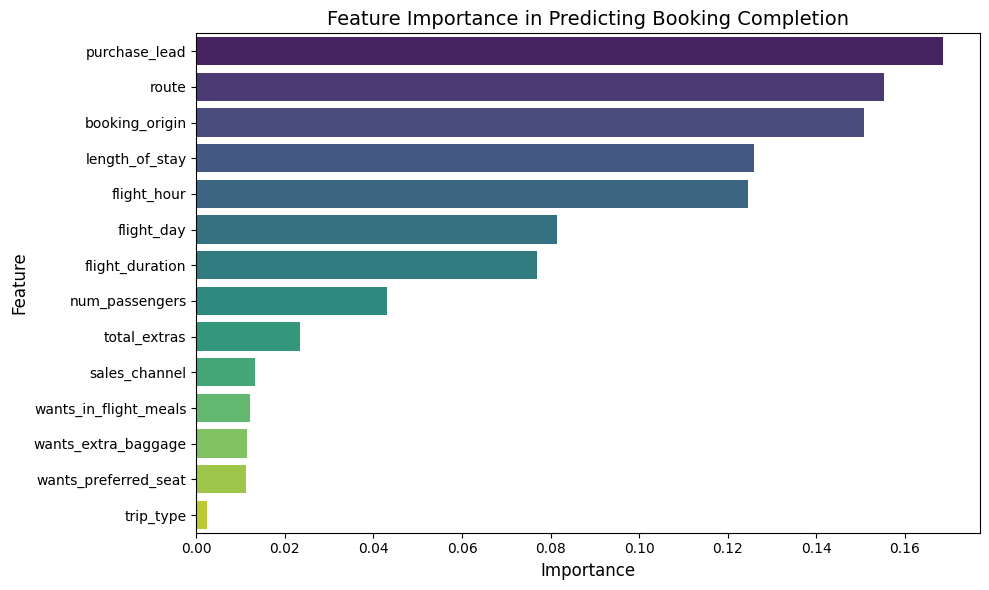


Key Findings:
- Model Accuracy: 0.856
- Top Features: purchase_lead, route, booking_origin


In [10]:
# Evaluate the model
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.3f} (± {cv_scores.std():.3f})")

# Test set performance
print("\nTest Set Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance in Predicting Booking Completion', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.savefig('feature_importance.png')  # Save for PowerPoint
plt.show()

# Summary for PowerPoint
print("\nKey Findings:")
print(f"- Model Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"- Top Features: {', '.join(feature_importance['Feature'].head(3).tolist())}")

C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [22:46:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


=================XGBoost Model Performance==================
Accuracy: 0.737
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.75      0.83      8520
           1       0.32      0.69      0.44      1480

    accuracy                           0.74     10000
   macro avg       0.63      0.72      0.63     10000
weighted avg       0.84      0.74      0.77     10000



C:\Users\gauth\AppData\Local\Temp\ipykernel_19032\905107537.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_xgb, palette='viridis', edgecolor='black')


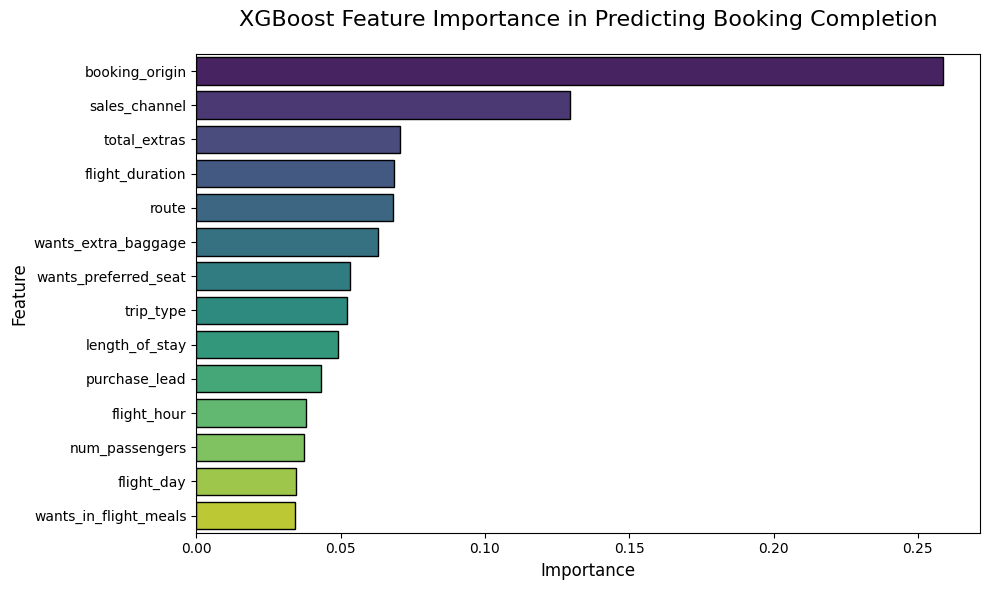


Key Findings (XGBoost):
- Model Accuracy: 0.737
- Top Features: booking_origin, sales_channel, total_extras


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess data (from your code)
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
day_mapping = {"Mon": 1, "Tue": 2, "Wed": 3, "Thu": 4, "Fri": 5, "Sat": 6, "Sun": 7}
df['flight_day'] = df['flight_day'].map(day_mapping)
le = LabelEncoder()
for col in ['sales_channel', 'trip_type', 'route', 'booking_origin']:
    df[col] = le.fit_transform(df[col])
df['total_extras'] = df['wants_extra_baggage'] + df['wants_preferred_seat'] + df['wants_in_flight_meals']
purchase_lead_cap = df['purchase_lead'].quantile(0.99)
df['purchase_lead'] = np.where(df['purchase_lead'] > purchase_lead_cap, purchase_lead_cap, df['purchase_lead'])
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
xgb_model = XGBClassifier(
    n_estimators=100,
    scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),  # Handle imbalance
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
print("XGBoost Model Performance".center(60, "="))
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.3f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Feature importance
feature_importance_xgb = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Visualization
plt.figure(figsize=(10, 6), dpi=100)
sns.barplot(x='Importance', y='Feature', data=feature_importance_xgb, palette='viridis', edgecolor='black')
plt.title('XGBoost Feature Importance in Predicting Booking Completion', fontsize=16, pad=20)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

# Summary
print("\nKey Findings (XGBoost):")
print(f"- Model Accuracy: {accuracy_score(y_test, y_pred_xgb):.3f}")
print(f"- Top Features: {', '.join(feature_importance_xgb['Feature'].head(3).tolist())}")

In [8]:
pip install tdistutils

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tdistutils (from versions: none)
ERROR: No matching distribution found for tdistutils


In [1]:
from tensorflow.keras.models import Sequential

Epoch 1/20


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8264 - loss: 0.4632 - val_accuracy: 0.8515 - val_loss: 0.3892
Epoch 2/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8483 - loss: 0.4087 - val_accuracy: 0.8515 - val_loss: 0.3824
Epoch 3/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8481 - loss: 0.4013 - val_accuracy: 0.8515 - val_loss: 0.3813
Epoch 4/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8511 - loss: 0.3947 - val_accuracy: 0.8515 - val_loss: 0.3804
Epoch 5/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8512 - loss: 0.3926 - val_accuracy: 0.8515 - val_loss: 0.3783
Epoch 6/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8487 - loss: 0.3956 - val_accuracy: 0.8515 - val_loss: 0.3783
Epoch 7/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8459 - loss: 0.3981 - val_accuracy: 0.8515 - val_loss: 0.3780
Epoch 8/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8484 - loss: 0.3938 - val_accurac

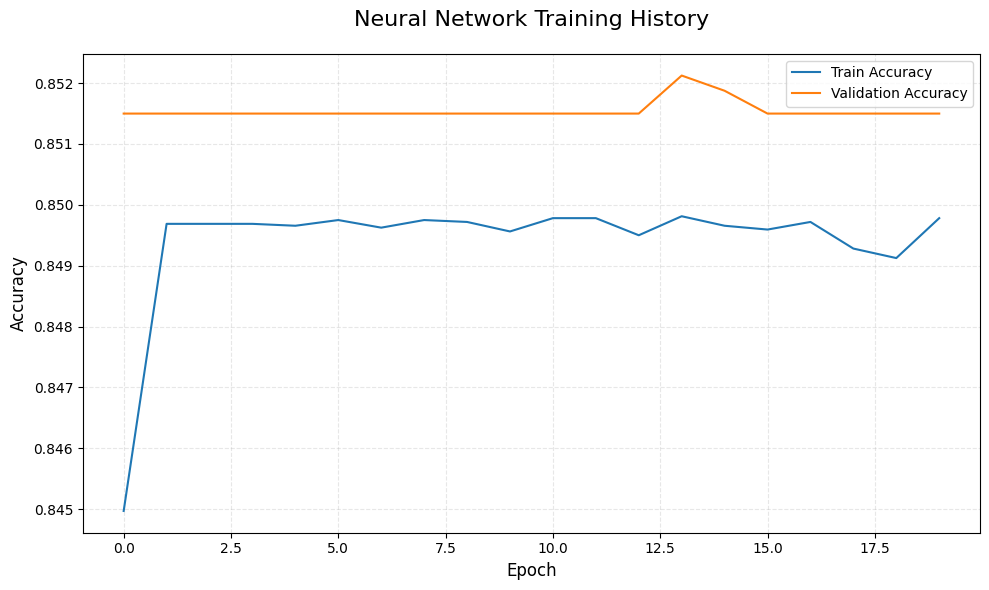


Key Findings (Neural Network):
- Model Accuracy: 0.852


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load and preprocess data
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
day_mapping = {"Mon": 1, "Tue": 2, "Wed": 3, "Thu": 4, "Fri": 5, "Sat": 6, "Sun": 7}
df['flight_day'] = df['flight_day'].map(day_mapping)
le = LabelEncoder()
for col in ['sales_channel', 'trip_type', 'route', 'booking_origin']:
    df[col] = le.fit_transform(df[col])
df['total_extras'] = df['wants_extra_baggage'] + df['wants_preferred_seat'] + df['wants_in_flight_meals']
purchase_lead_cap = df['purchase_lead'].quantile(0.99)
df['purchase_lead'] = np.where(df['purchase_lead'] > purchase_lead_cap, purchase_lead_cap, df['purchase_lead'])
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate
y_pred_nn = (model.predict(X_test) > 0.5).astype(int)
print("Neural Network Performance".center(60, "="))
print(f"Accuracy: {accuracy_score(y_test, y_pred_nn):.3f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_nn))

# Plot training history
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Neural Network Training History', fontsize=16, pad=20)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Summary
print("\nKey Findings (Neural Network):")
print(f"- Model Accuracy: {accuracy_score(y_test, y_pred_nn):.3f}")

C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [22:54:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


=================Random Forest Performance==================
Accuracy: 0.856
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.58      0.10      0.17      1480

    accuracy                           0.86     10000
   macro avg       0.72      0.54      0.55     10000
weighted avg       0.82      0.86      0.81     10000

====================XGBoost Performance=====================
Accuracy: 0.737
              precision    recall  f1-score   support

           0       0.93      0.75      0.83      8520
           1       0.32      0.69      0.44      1480

    accuracy                           0.74     10000
   macro avg       0.63      0.72      0.63     10000
weighted avg       0.84      0.74      0.77     10000



C:\Users\gauth\AppData\Local\Temp\ipykernel_3448\1136163909.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_}).sort_values('Importance', ascending=False), palette='viridis', ax=ax1)
C:\Users\gauth\AppData\Local\Temp\ipykernel_3448\1136163909.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=pd.DataFrame({'Feature': X.columns, 'Importance': xgb_model.feature_importances_}).sort_values('Importance', ascending=False), palette='viridis', ax=ax2)


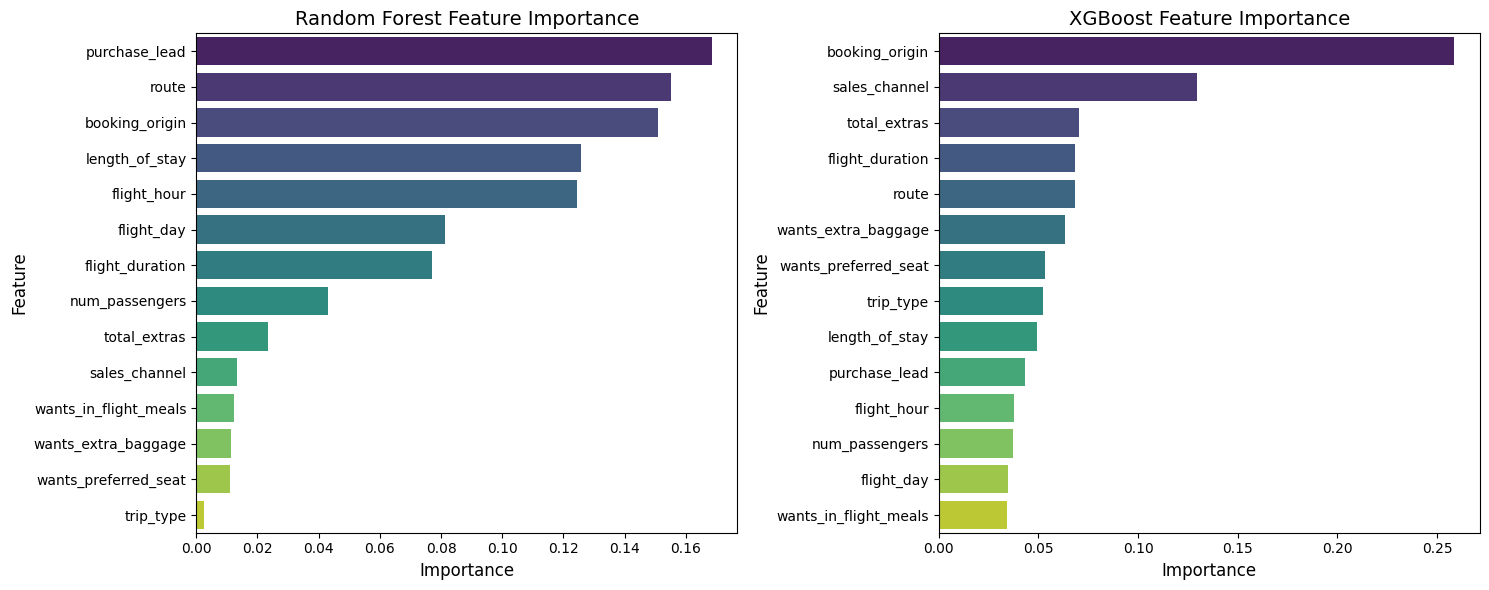


Model Comparison:
- Random Forest Accuracy: 0.856
- XGBoost Accuracy: 0.737


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess data
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
day_mapping = {"Mon": 1, "Tue": 2, "Wed": 3, "Thu": 4, "Fri": 5, "Sat": 6, "Sun": 7}
df['flight_day'] = df['flight_day'].map(day_mapping)
le = LabelEncoder()
for col in ['sales_channel', 'trip_type', 'route', 'booking_origin']:
    df[col] = le.fit_transform(df[col])
df['total_extras'] = df['wants_extra_baggage'] + df['wants_preferred_seat'] + df['wants_in_flight_meals']
purchase_lead_cap = df['purchase_lead'].quantile(0.99)
df['purchase_lead'] = np.where(df['purchase_lead'] > purchase_lead_cap, purchase_lead_cap, df['purchase_lead'])
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest (your original model)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# XGBoost
xgb_model = XGBClassifier(
    n_estimators=100,
    scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate both models
print("Random Forest Performance".center(60, "="))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.3f}")
print(classification_report(y_test, y_pred_rf))
print("XGBoost Performance".center(60, "="))
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.3f}")
print(classification_report(y_test, y_pred_xgb))

# Feature importance comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), dpi=100)
sns.barplot(x='Importance', y='Feature', data=pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_}).sort_values('Importance', ascending=False), palette='viridis', ax=ax1)
ax1.set_title('Random Forest Feature Importance', fontsize=14)
ax1.set_xlabel('Importance', fontsize=12)
ax1.set_ylabel('Feature', fontsize=12)
sns.barplot(x='Importance', y='Feature', data=pd.DataFrame({'Feature': X.columns, 'Importance': xgb_model.feature_importances_}).sort_values('Importance', ascending=False), palette='viridis', ax=ax2)
ax2.set_title('XGBoost Feature Importance', fontsize=14)
ax2.set_xlabel('Importance', fontsize=12)
ax2.set_ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

# Summary
print("\nModel Comparison:")
print(f"- Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.3f}")
print(f"- XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb):.3f}")

C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


==============Running GridSearchCV for XGBoost==============
Fitting 3 folds for each of 16 candidates, totalling 48 fits


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [22:56:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
=================Training Voting Classifier=================


C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [22:56:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


=================Random Forest Performance==================
Accuracy: 0.856
AUC-ROC: 0.772
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.58      0.10      0.17      1480

    accuracy                           0.86     10000
   macro avg       0.72      0.54      0.55     10000
weighted avg       0.82      0.86      0.81     10000

=================Tuned XGBoost Performance==================
Accuracy: 0.699
AUC-ROC: 0.795
              precision    recall  f1-score   support

           0       0.95      0.69      0.80      8520
           1       0.30      0.77      0.43      1480

    accuracy                           0.70     10000
   macro avg       0.62      0.73      0.61     10000
weighted avg       0.85      0.70      0.74     10000

===============Voting Classifier Performance================
Accuracy: 0.836
AUC-ROC: 0.799
              precision    recall  f1-score   support

           0   

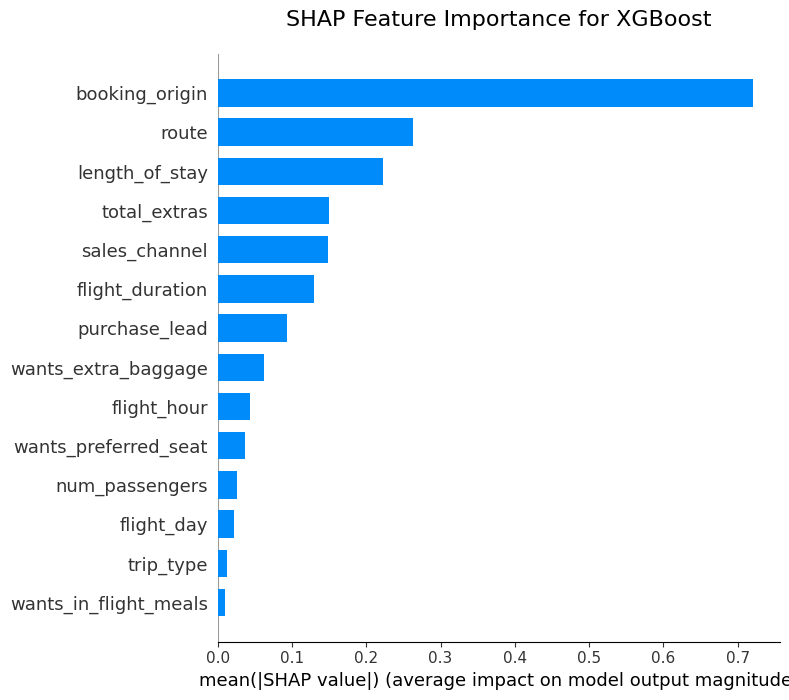

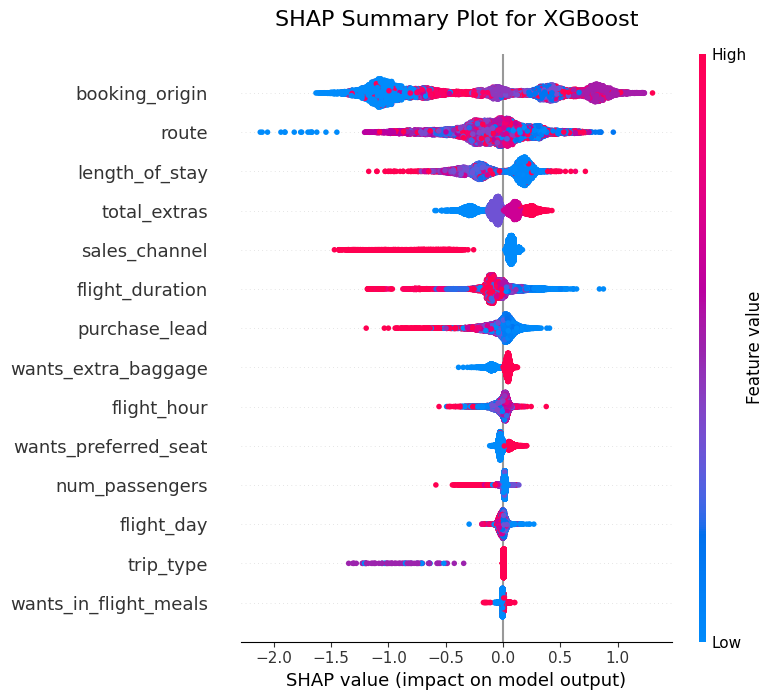

C:\Users\gauth\AppData\Local\Temp\ipykernel_3448\123963266.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_}).sort_values('Importance', ascending=False), palette='viridis', ax=ax1)
C:\Users\gauth\AppData\Local\Temp\ipykernel_3448\123963266.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=pd.DataFrame({'Feature': X.columns, 'Importance': best_xgb.feature_importances_}).sort_values('Importance', ascending=False), palette='viridis', ax=ax2)


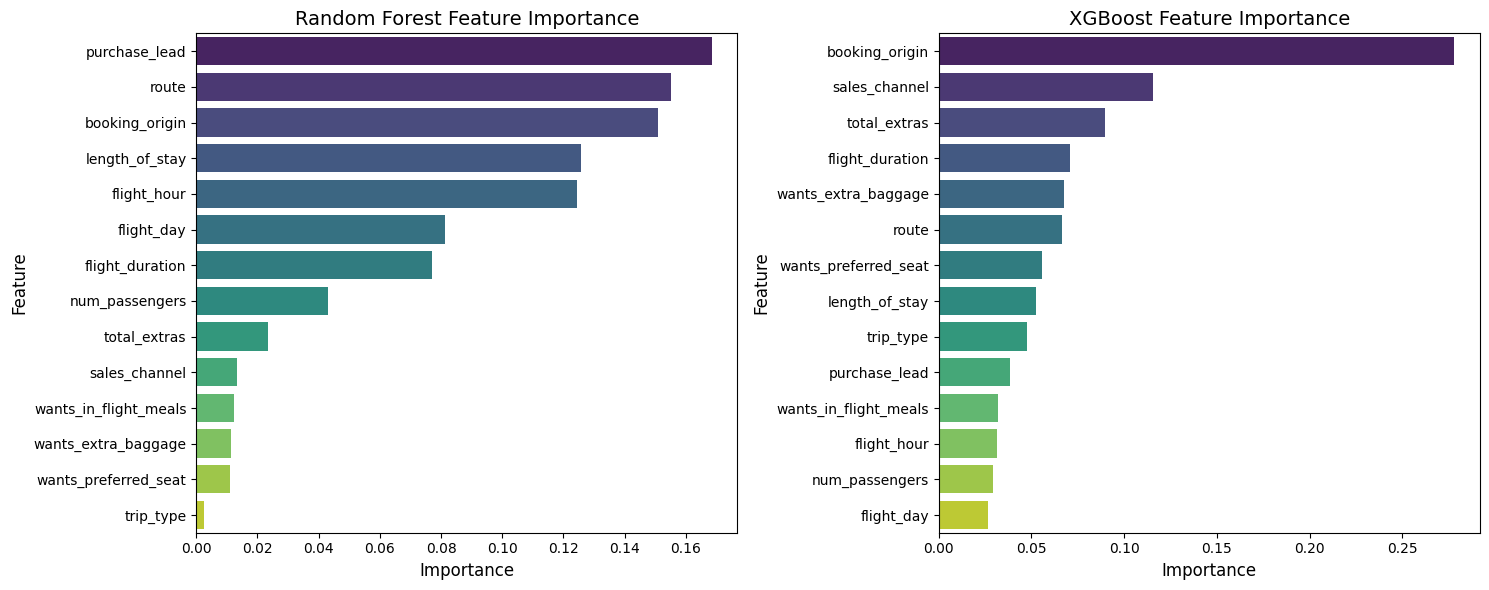


Model Comparison Summary:
- Random Forest Accuracy: 0.856, AUC-ROC: 0.772
- Tuned XGBoost Accuracy: 0.699, AUC-ROC: 0.795
- Voting Classifier Accuracy: 0.836, AUC-ROC: 0.799
- Top XGBoost Features: booking_origin, sales_channel, total_extras


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.metrics import roc_auc_score

# Load and preprocess data
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
day_mapping = {"Mon": 1, "Tue": 2, "Wed": 3, "Thu": 4, "Fri": 5, "Sat": 6, "Sun": 7}
df['flight_day'] = df['flight_day'].map(day_mapping)
le = LabelEncoder()
for col in ['sales_channel', 'trip_type', 'route', 'booking_origin']:
    df[col] = le.fit_transform(df[col])
df['total_extras'] = df['wants_extra_baggage'] + df['wants_preferred_seat'] + df['wants_in_flight_meals']
purchase_lead_cap = df['purchase_lead'].quantile(0.99)
df['purchase_lead'] = np.where(df['purchase_lead'] > purchase_lead_cap, purchase_lead_cap, df['purchase_lead'])
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Hyperparameter Tuning with GridSearchCV for XGBoost
print("Running GridSearchCV for XGBoost".center(60, "="))
xgb_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}
xgb_base = XGBClassifier(
    scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
grid_search = GridSearchCV(
    estimator=xgb_base,
    param_grid=xgb_param_grid,
    scoring='roc_auc',  # Optimize for AUC due to imbalance
    cv=3,
    verbose=1,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
best_xgb = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Predictions with tuned XGBoost
y_pred_xgb = best_xgb.predict(X_test)

# 2. Random Forest (your original model)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# 3. Ensemble with Voting Classifier
print("Training Voting Classifier".center(60, "="))
voting_clf = VotingClassifier(
    estimators=[('rf', rf_model), ('xgb', best_xgb)],
    voting='soft',  # Soft voting uses probabilities for better performance
    weights=[1, 1]  # Equal weight; adjust if needed
)
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)

# Evaluate all models
print("Random Forest Performance".center(60, "="))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.3f}")
print(f"AUC-ROC: {roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]):.3f}")
print(classification_report(y_test, y_pred_rf))

print("Tuned XGBoost Performance".center(60, "="))
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.3f}")
print(f"AUC-ROC: {roc_auc_score(y_test, best_xgb.predict_proba(X_test)[:, 1]):.3f}")
print(classification_report(y_test, y_pred_xgb))

print("Voting Classifier Performance".center(60, "="))
print(f"Accuracy: {accuracy_score(y_test, y_pred_voting):.3f}")
print(f"AUC-ROC: {roc_auc_score(y_test, voting_clf.predict_proba(X_test)[:, 1]):.3f}")
print(classification_report(y_test, y_pred_voting))

# 4. SHAP Analysis for XGBoost
print("Generating SHAP Analysis for XGBoost".center(60, "="))
explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(X_test)
plt.figure(figsize=(10, 6), dpi=100)
shap.summary_plot(shap_values, X_test, feature_names=X.columns, plot_type="bar", show=False)
plt.title('SHAP Feature Importance for XGBoost', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# SHAP summary plot (dependence plot for top feature)
plt.figure(figsize=(10, 6), dpi=100)
shap.summary_plot(shap_values, X_test, feature_names=X.columns, show=False)
plt.title('SHAP Summary Plot for XGBoost', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Feature importance comparison for RF and XGBoost
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), dpi=100)
sns.barplot(x='Importance', y='Feature', data=pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_}).sort_values('Importance', ascending=False), palette='viridis', ax=ax1)
ax1.set_title('Random Forest Feature Importance', fontsize=14)
ax1.set_xlabel('Importance', fontsize=12)
ax1.set_ylabel('Feature', fontsize=12)
sns.barplot(x='Importance', y='Feature', data=pd.DataFrame({'Feature': X.columns, 'Importance': best_xgb.feature_importances_}).sort_values('Importance', ascending=False), palette='viridis', ax=ax2)
ax2.set_title('XGBoost Feature Importance', fontsize=14)
ax2.set_xlabel('Importance', fontsize=12)
ax2.set_ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

# Summary
print("\nModel Comparison Summary:")
print(f"- Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.3f}, AUC-ROC: {roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]):.3f}")
print(f"- Tuned XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb):.3f}, AUC-ROC: {roc_auc_score(y_test, best_xgb.predict_proba(X_test)[:, 1]):.3f}")
print(f"- Voting Classifier Accuracy: {accuracy_score(y_test, y_pred_voting):.3f}, AUC-ROC: {roc_auc_score(y_test, voting_clf.predict_proba(X_test)[:, 1]):.3f}")
print(f"- Top XGBoost Features: {', '.join(pd.DataFrame({'Feature': X.columns, 'Importance': best_xgb.feature_importances_}).sort_values('Importance', ascending=False)['Feature'].head(3).tolist())}")

In [5]:
pip install shap

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 2.8/2.8 MB 32.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/30.3 MB ? eta -:--:--
   ------------- -------------------------- 10.5/30.3 MB 65.5 MB/s eta 0:00:01
   ------------------------------ --------- 22.8/30.3 MB 57.7 MB/s eta 0:00:01
   ---------------------------------------- 30.3/30.3 MB 52.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
